<a href="https://colab.research.google.com/github/sriharikrishna/siamcse21/blob/main/rosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosenbrock function
Also known as Rosenbrock's valley or Rosenbrock's banana function, the Rosenbrock function is a performace test for optimization. The narrow long valley makes it difficult to find the minimum. 

\begin{equation}
F(x) = \sum_{i=0}^{N-1}100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2.
\end{equation}


### Primal Function

In [67]:
import jax
from jax import random
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x):
    """
    Computes the Rosenbrock's banana
    x : array of values
    """
    result = jnp.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0,axis=0)
    return result

def plot_vals(vals, grad=None):
    plt.plot(vals,label='values')
    if grad != None:
      plt.plot(grad,label='grad')
    plt.legend()
    plt.title('')
    plt.figure()
    plt.show()

### Primal Driver

In [68]:
def rosenbrockdriver(n):
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)
    
    #compute the result
    result = rosenbrock(val)
    
    print("The input is", val)
    print("The result of Rosenbrock's is ", result)

In [69]:
rosenbrockdriver(10)

The input is [-0.372111    0.26423106 -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.5908642   0.73168874  0.5673025 ]
The result of Rosenbrock's is  362.9996


### First look at derivatives: `jax.grad()`
1. Appropriate for a scalar function
2. Uses reverse mode (it is a wrapper for `jax.jacjvp()`)
3. Assumes a seed of `1.0`. 
   (For reverse mode the shape of the seed must match the primal output.)
4. Produces $\frac{\partial{F(x)}}{\partial{x}}$   

In [70]:
#Create a function that computes the derivatives
grad_rosenbrock = jax.grad(rosenbrock)

def rosenbrockgrad(n):
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)
    
    #compute the result
    result = grad_rosenbrock(val)
    plot_vals(val,grad=result)
    print("The input is", val)
    print("The grad result is ", result)

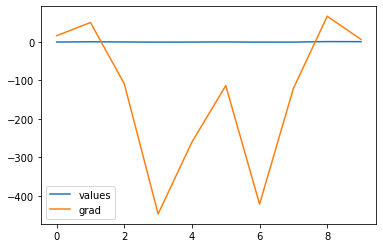

<Figure size 432x288 with 0 Axes>

The input is [-0.372111    0.26423106 -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.5908642   0.73168874  0.5673025 ]
The grad result is  [  15.975112    50.352394  -109.0627    -447.27954   -260.4622
 -113.772415  -421.95035   -121.07933     66.63069      6.3868284]


In [71]:
rosenbrockgrad(10)

### Forward mode using: `jax.jacjvp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.jvp
1. Uses forward mode, returns the gradients for a function $R^n \rightarrow R^m$. 
2. You must provide the primal and a seed vector. 
   (For forward mode the shape of the seed must match the primal input.)
4. Produces $\frac{\partial{F(x)}}{\partial{x}}$  
5. The code below obtains the entire Jacobian by calling `jax.jacjvp()` multiple times.

In [72]:
def rosenbrockjvp(n):
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val = random.truncated_normal(key, -2.048, 2.048, (n,), jnp.float64)
    tangents = jnp.empty([0])
    iden_seed = jnp.eye(n)
    for i in range(n):
        primal_output, res = jax.jvp(rosenbrock, (val,), (iden_seed[i],))
        tangents = jnp.append(tangents, res)
    plot_vals(val,grad=tangents)
    print("The input is", val)
    print("The jax.jvp result is ", tangents)

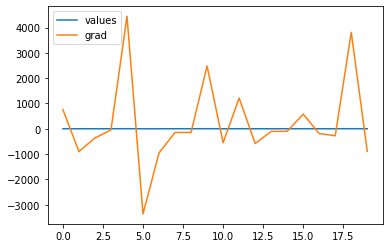

<Figure size 432x288 with 0 Axes>

The input is [ 0.99368227 -0.9163586  -0.5676452  -0.0305921   1.912388   -1.652498
 -0.74610704 -0.30058542  0.31969216  1.5780985  -0.9695159   1.303695
 -0.48612535 -0.50308347  0.48105147  0.9941     -0.08385366  0.7563916
  1.9761826  -0.5560126 ]
The jax.jvp result is  [  756.6816    -900.44324   -364.716      -49.23369   4445.8174
 -3365.4497    -954.70703   -146.47884   -144.22537   2480.3672
  -554.8629    1213.1726    -583.89813   -105.01357   -102.203354
   578.8313    -191.45076   -275.42114   3809.3086    -892.26196 ]


In [73]:
rosenbrockjvp(20)

### Reverse mode using: `jax.jacvjp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.vjp
2. Uses reverse mode, returns a function that computes the adjoints for a funtion $R^n \rightarrow R^m$.
3. You can provide a seed. We have chosen `0.5` by default. 
4. Exercise: See how values change as the seed changes.
1. https://jax.readthedocs.io/en/latest/jax.html#jax.jvp
 
2. You must provide the primal and a seed vector. 
   (For forward mode the shape of the seed must match the primal input.)
4. Produces $\frac{\partial{F(x)}}{\partial{x}}$  
5. The code below obtains the entire Jacobian by calling `jax.jacjvp()` multiple times.

In [74]:
def rosenbrockvjp(n):    
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)
    primals, fun_vjp = jax.vjp(rosenbrock, val)
    
    # The argument of fun_vjp() can be any real number
    seed = 0.5
    adj_val = fun_vjp(seed)
    plot_vals(val,grad=jnp.stack(adj_val[0]))

    print("The input is", val)
    print("The jax.vjp result is ", adj_val[0])

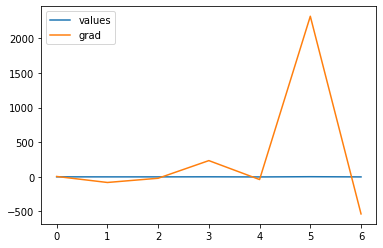

<Figure size 432x288 with 0 Axes>

The input is [ 0.08086776 -0.38624716 -0.37565574  0.586919   -1.2758199   2.1192
 -0.85821235]
The jax.vjp result is  [   5.4336247  -81.20871    -20.366314   234.36336    -38.8963
 2317.4814    -534.9221   ]


In [75]:
rosenbrockvjp(7)

# Multiple Input Arrays
1. `jax.grad()` `jax.jvp()` `jax.vjp()` all support multiple arrays as *input*

In [76]:
def rosenbrock2(x,y):
    """
    Computes the Rosenbrock's banana
    x : array of values
    """
    result = jnp.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0,axis=0)
    result += jnp.sum(100.0 * (y[1:] - y[:-1]**2.0)**2.0 + (1 - y[:-1])**2.0,axis=0)
    return result

In [77]:
#Create a function that computes the derivatives
grad_rosenbrock2 = jax.grad(rosenbrock2, argnums=(0,1))

def rosenbrock2grad(n1, n2):
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val1 = random.normal(key, (n1,), jnp.float64)
    val2 = random.normal(key, (n2,), jnp.float64)

    #compute the result
    result1, result2 = grad_rosenbrock2(val1, val2,)
    print("The input is", val1, val2)
    print("The grad result is ", result1, result2)

In [78]:
rosenbrock2grad(3,4)

The input is [ 1.8160859  -0.4826233   0.33988902] [ 1.8160858 -0.7548852  0.339889  -0.5348355]
The grad result is  [2748.1292   -738.4743     21.392754] [2945.909   -883.55853   41.10733 -130.072  ]


In [79]:
def rosenbrock2jvp(n1, n2):
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val1 = random.normal(key, (n1,), jnp.float64)
    val2 = random.normal(key, (n2,), jnp.float64)
    tangents = jnp.empty([0])
    iden_seed1 = jnp.eye(n1)
    iden_seed2 = jnp.eye(n2)
    zero1 = jnp.zeros(n1)
    zero2 = jnp.zeros(n2)
    for i in range(n1):
        primal_output, res = jax.jvp(rosenbrock2, (val1, val2), (iden_seed1[i],zero2))
        tangents = jnp.append(tangents, res)
    for i in range(n2):
        primal_output, res = jax.jvp(rosenbrock2, (val1, val2), (zero1, iden_seed2[i],))
        tangents = jnp.append(tangents, res)
    print("The input is", val1, val2)
    print("The jax.jvp result is ", tangents)

In [80]:
rosenbrock2jvp(3,4)

The input is [ 1.8160859  -0.4826233   0.33988902] [ 1.8160858 -0.7548852  0.339889  -0.5348355]
The jax.jvp result is  [2748.1292   -738.4743     21.392754 2945.909    -883.55853    41.107338
 -130.072   ]


In [81]:
def rosenbrock2vjp(n1,n2):    
    """
    n must be a positive integer
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val1 = random.normal(key, (n1,), jnp.float64)
    val2 = random.normal(key, (n2,), jnp.float64)
    primals, fun_vjp = jax.vjp(rosenbrock2, val1,val2)
    
    # The argument of fun_vjp() can be any real number
    seed = 0.5
    adj_val1, adj_val2 = fun_vjp(seed)
    print("The input is", val1, val2)
    print("The jax.vjp result is ", np.array(adj_val1),np.array(adj_val2))

In [82]:
rosenbrock2vjp(3,4)

The input is [ 1.8160859  -0.4826233   0.33988902] [ 1.8160858 -0.7548852  0.339889  -0.5348355]
The jax.vjp result is  [1374.0646   -369.23715    10.696377] [1472.9545   -441.77927    20.553665  -65.036   ]
